#  Problem Statement  
>Maximizing Net Solar Energy Production  

### Data Attributes

In [122]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

In [123]:
df = pd.read_csv('D:\Report.csv')

### Size of dataset

In [124]:
print(df.shape)

(29, 28)


### Data type of column

In [125]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29 entries, 0 to 28
Data columns (total 28 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   TimeStamp              29 non-null     object 
 1   START_TIME             29 non-null     object 
 2   STOP_TIME              29 non-null     object 
 3   OperationMinute        29 non-null     object 
 4   DC_CAP                 29 non-null     float64
 5   AC_CAP                 29 non-null     float64
 6   Inv_Exp                29 non-null     float64
 7   TODAY_EXP              29 non-null     float64
 8   TODAY_IMP              29 non-null     float64
 9   TODAY_NET_EXP          29 non-null     float64
 10  TODAY_PR               29 non-null     float64
 11  TODAY_AC_CUF           29 non-null     float64
 12  POWER_TODAY_PEAK       29 non-null     float64
 13  POWER_TODAY_PEAK_TIME  28 non-null     object 
 14  GII_PEAK_TODAY         29 non-null     float64
 15  GII_PEAL

### Sample of the dataset

In [126]:
df.sample(10)

,TimeStamp,START_TIME,STOP_TIME,OperationMinute,DC_CAP,AC_CAP,Inv_Exp,TODAY_EXP,TODAY_IMP,TODAY_NET_EXP,...,Avg_GII,Avg_GHI,Avg_WS,Avg_AmbTemp,Avg_ModTemp,Max_AmbTemp,Max_ModTemp,DHI_ACC,ALBENO_DOWN_ACC,ALBENO_UP_ACC
6,2023-04-14,2023-04-14 06:04:00,2023-04-14 18:39:00,12:11:00,95.29,70.0,481.55,468.13,0.85,467.28,...,336.74,349.69,0.17,35.49,0,40.8,0,2.90,0.91,5.60
12,2023-04-20,2023-04-20 06:02:00,2023-04-20 17:17:00,12:34:59,95.29,70.0,533.96,444.88,0.81,444.06,...,326.27,345.38,0.62,32.30,0,41.1,0,2.23,0.93,5.47
4,2023-04-12,2023-04-12 06:06:00,2023-04-12 18:39:00,12:14:59,95.29,70.0,562.45,544.60,0.81,543.79,...,412.50,419.05,0.21,35.51,0,41.5,0,1.97,1.09,6.74
10,2023-04-18,2023-04-18 06:00:00,2023-04-18 18:41:00,12:12:59,95.29,70.0,562.05,507.12,0.80,506.32,...,374.93,395.24,0.19,36.65,0,43.1,0,2.24,1.06,6.31
18,2023-04-26,2023-04-26 05:53:00,2023-04-26 18:49:00,12:33:59,95.29,70.0,508.15,460.70,0.76,459.93,...,339.95,356.02,0.84,30.41,0,37.5,0,1.97,0.94,5.66
26,2023-05-04,2023-05-04 05:50:00,2023-05-04 18:49:00,12:40:00,95.29,70.0,563.69,545.41,0.81,544.59,...,412.76,431.82,0.24,30.03,0,34.9,0,2.32,0.91,6.96
11,2023-04-19,2023-04-19 06:02:00,2023-04-19 18:51:00,12:28:59,95.29,70.0,546.70,527.26,0.78,526.48,...,396.08,415.67,0.06,35.69,0,41.6,0,2.31,1.12,6.59
2,2023-04-10,2023-04-10 06:10:00,2023-04-10 18:42:00,12:12:00,95.29,70.0,547.92,530.78,0.84,529.94,...,413.12,414.73,0.08,31.56,0,38.1,0,2.07,0.97,6.43
24,2023-05-02,2023-05-02 05:45:00,2023-05-02 18:51:00,12:37:00,95.29,70.0,529.05,511.59,0.82,510.77,...,384.50,409.88,0.14,30.18,0,36.2,0,2.03,0.93,6.58
5,2023-04-13,2023-04-13 06:01:00,2023-04-13 18:40:00,12:14:59,95.29,70.0,548.17,450.83,0.81,450.02,...,331.73,341.94,0.08,35.54,0,40.8,0,2.74,0.89,5.49


### Statistical measurements of the dataset

In [127]:
df.describe()

,DC_CAP,AC_CAP,Inv_Exp,TODAY_EXP,TODAY_IMP,TODAY_NET_EXP,TODAY_PR,TODAY_AC_CUF,POWER_TODAY_PEAK,GII_PEAK_TODAY,...,Avg_GII,Avg_GHI,Avg_WS,Avg_AmbTemp,Avg_ModTemp,Max_AmbTemp,Max_ModTemp,DHI_ACC,ALBENO_DOWN_ACC,ALBENO_UP_ACC
count,2.900000e+01,29.0,29.000000,29.000000,29.000000,29.000000,29.000000,29.000000,29.000000,29.000000,...,29.000000,29.000000,29.000000,29.000000,29.0,29.000000,29.0,29.000000,29.000000,29.000000
mean,9.529000e+01,70.0,524.323448,491.545172,0.830000,490.714483,88.284138,29.254138,74.994828,1052.218966,...,365.908966,382.088621,0.326897,31.794138,0.0,38.017241,0.0,2.164138,0.953103,6.091379
std,1.446239e-14,0.0,60.517745,61.803097,0.059402,61.807995,2.553434,3.678482,1.837078,86.790988,...,53.251314,54.704787,0.256767,3.302901,0.0,3.344512,0.0,0.455126,0.180299,0.879751
min,9.529000e+01,70.0,368.400000,344.800000,0.720000,343.910000,84.600000,20.520000,72.530000,950.130000,...,232.600000,246.970000,0.050000,25.030000,0.0,30.600000,0.0,1.120000,0.490000,3.990000
25%,9.529000e+01,70.0,493.540000,450.830000,0.800000,450.020000,86.630000,26.830000,73.570000,994.130000,...,331.730000,349.690000,0.140000,30.030000,0.0,36.300000,0.0,1.920000,0.870000,5.530000
50%,9.529000e+01,70.0,543.710000,495.610000,0.820000,494.790000,87.720000,29.500000,74.560000,1027.430000,...,372.820000,381.710000,0.240000,32.110000,0.0,38.500000,0.0,2.180000,0.940000,6.080000
75%,9.529000e+01,70.0,563.690000,544.600000,0.860000,543.790000,89.720000,32.410000,76.130000,1087.200000,...,412.500000,419.050000,0.460000,34.200000,0.0,40.800000,0.0,2.320000,1.090000,6.740000
max,9.529000e+01,70.0,609.740000,589.380000,1.000000,588.500000,96.770000,35.080000,78.650000,1276.110000,...,454.990000,472.630000,1.030000,36.650000,0.0,43.100000,0.0,3.170000,1.250000,7.520000


### Overview of Missing Data Points
>A missing data point refers to a value that is not stored or observed for a particular variable in a dataset. Essentially, it's a gap in your information.

>Why Are Missing Data Points a Problem?<br>
1.Reduced Sample Size: Missing data reduces the amount of usable information in your dataset, which can affect the statistical power of your analyses.<br>
2.Biased Results: If the missing data isn't random, it can introduce bias into your analyses and lead to incorrect conclusions.<br>
3.Modeling Challenges: Machine learning models often require complete data. Missing values can create problems for training and prediction.

>Types of Missing Data:<br>
1.Missing Completely at Random (MCAR): The probability of a data point being missing is unrelated to any other observed or unobserved values.<br>
2.Missing at Random (MAR): The probability of missing data is related to other observed variables in the dataset, but not the missing values themselves.<br>
3.Missing Not at Random (MNAR): The probability of a missing value depends on the missing value itself. This is the most difficult type to deal with.

>Dealing with Missing Data:<br>
The best approach for handling missing data depends on the type and extent of missingness:<br>
1.Deletion: Removing rows or columns with missing data (only if the missingness is MCAR and the data loss is minimal).<br>
2.Imputation: Replacing missing values with estimated values (e.g., mean, median, mode, regression, or multiple imputation).<br>
3.Modeling Techniques: Some models can handle missing data directly or have specialized ways of dealing with it.



In [128]:
df.isnull().sum()

TimeStamp                0
START_TIME               0
STOP_TIME                0
OperationMinute          0
DC_CAP                   0
AC_CAP                   0
Inv_Exp                  0
TODAY_EXP                0
TODAY_IMP                0
TODAY_NET_EXP            0
TODAY_PR                 0
TODAY_AC_CUF             0
POWER_TODAY_PEAK         0
POWER_TODAY_PEAK_TIME    1
GII_PEAK_TODAY           0
GII_PEAL_TODAY_TIME      3
POA_ACC                  0
GHI_ACC                  0
Avg_GII                  0
Avg_GHI                  0
Avg_WS                   0
Avg_AmbTemp              0
Avg_ModTemp              0
Max_AmbTemp              0
Max_ModTemp              0
DHI_ACC                  0
ALBENO_DOWN_ACC          0
ALBENO_UP_ACC            0
dtype: int64

### Missing Data Heatmap
>A missing data heatmap is a visual representation of the pattern of missing values within a dataset. It uses color intensity to indicate where missing values occur in your columns or rows.

>Key Features:<br>
1.Black Background:  The black background represents cells in your DataFrame that contain valid data (not missing values).<br>
2.Peach Color Dots: The peach color dots represent cells where data is missing (NaN values).  The intensity of the peach color might vary slightly depending on your default Seaborn color palette.

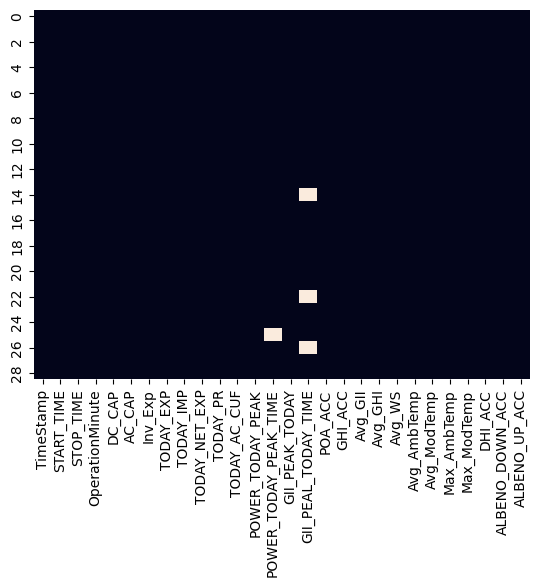

In [129]:
sns.heatmap(df.isnull(), cbar=False)
plt.show()

### Total duplicate data points

In [130]:
df.duplicated().sum()

0

### Numerical Data of the Dataset

In [131]:
df.select_dtypes('number').head()

,DC_CAP,AC_CAP,Inv_Exp,TODAY_EXP,TODAY_IMP,TODAY_NET_EXP,TODAY_PR,TODAY_AC_CUF,POWER_TODAY_PEAK,GII_PEAK_TODAY,...,Avg_GII,Avg_GHI,Avg_WS,Avg_AmbTemp,Avg_ModTemp,Max_AmbTemp,Max_ModTemp,DHI_ACC,ALBENO_DOWN_ACC,ALBENO_UP_ACC
0,95.29,70.0,393.57,383.77,0.89,382.88,91.31,22.84,77.65,1078.00,...,276.92,286.44,0.39,27.78,0,32.2,0,2.69,0.74,4.57
1,95.29,70.0,467.08,452.63,0.80,451.83,85.64,26.94,74.56,1058.11,...,339.82,349.88,0.46,29.99,0,38.2,0,1.92,0.87,5.34
2,95.29,70.0,547.92,530.78,0.84,529.94,84.60,31.59,75.26,1047.12,...,413.12,414.73,0.08,31.56,0,38.1,0,2.07,0.97,6.43
3,95.29,70.0,543.71,464.15,0.81,463.34,87.71,27.62,72.86,994.13,...,344.37,353.02,0.18,34.10,0,40.2,0,2.18,0.88,5.56
4,95.29,70.0,562.45,544.60,0.81,543.79,86.63,32.41,72.90,954.39,...,412.50,419.05,0.21,35.51,0,41.5,0,1.97,1.09,6.74


### Categorical Data of the Dataset

In [132]:
df.select_dtypes('object').head()

,TimeStamp,START_TIME,STOP_TIME,OperationMinute,POWER_TODAY_PEAK_TIME,GII_PEAL_TODAY_TIME
0,2023-04-08,2023-04-08 06:17:00,2023-04-08 18:39:00,12:00:59,2023-04-08T11:57:00.883Z,2023-04-08T11:58:00.977Z
1,2023-04-09,2023-04-09 06:08:00,2023-04-09 18:41:00,12:12:59,2023-04-09T12:02:00.743Z,2023-04-09T12:41:01.813Z
2,2023-04-10,2023-04-10 06:10:00,2023-04-10 18:42:00,12:12:00,2023-04-10T11:59:00.333Z,2023-04-10T12:04:00.667Z
3,2023-04-11,2023-04-11 06:08:00,2023-04-11 18:42:00,12:16:59,2023-04-11T12:31:00.323Z,2023-04-11T12:35:04.4Z
4,2023-04-12,2023-04-12 06:06:00,2023-04-12 18:39:00,12:14:59,2023-04-12T12:22:00.82Z,2023-04-12T12:21:00.663Z


### Correlation Matrix
>Correlation refers to the statistical measure that quantifies the strength and direction of a relationship between two variables. It indicates how closely the values of two variables move together. Correlation does not imply causation; it only shows whether changes in one variable are associated with changes in another variable.

>The correlation coefficient is a statistical measure that quantifies the strength and direction of the linear relationship between two continuous variables.

>A correlation matrix is a table that shows the correlation coefficients between multiple variables. Correlation coefficients quantify the strength and direction of the linear relationship between two variables. They can range from -1 to 1, where:

>A correlation coefficient of +1 indicates a perfect positive linear relationship, meaning that as one variable increases, the other variable also increases proportionally. A correlation coefficient of -1 indicates a perfect negative linear relationship, meaning that as one variable increases, the other variable decreases proportionally. A correlation coefficient of 0 indicates no linear relationship between the variables.

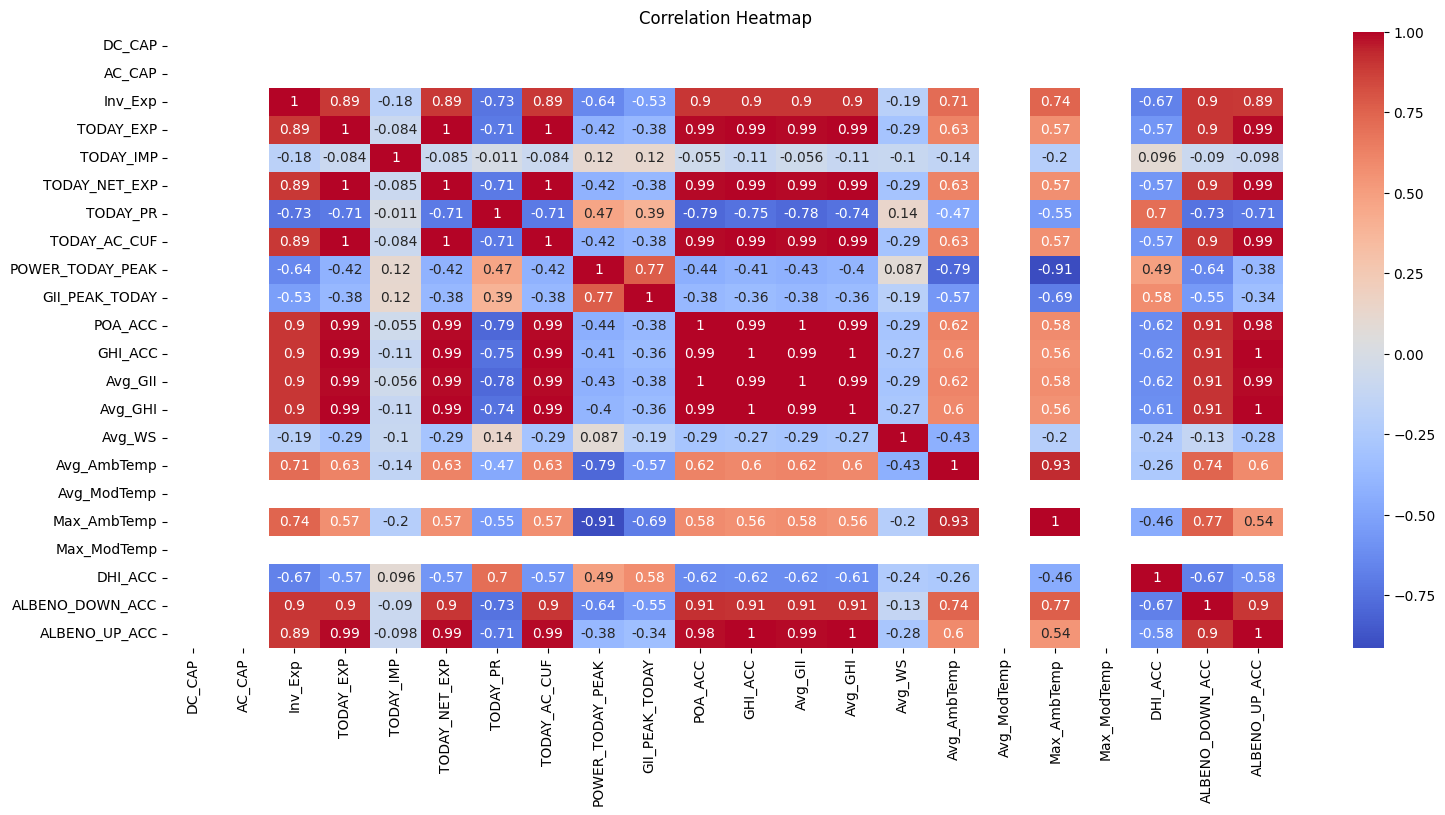

In [133]:
# Get numerical columns
numeric_df = df.select_dtypes(include='number')

# Calculate correlation matrix only on numerical columns
plt.figure(figsize=(18, 8))
sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()

### Multivariant Analysis
>evaluating multiple variables which are highly correlated, to identify possible association among them.

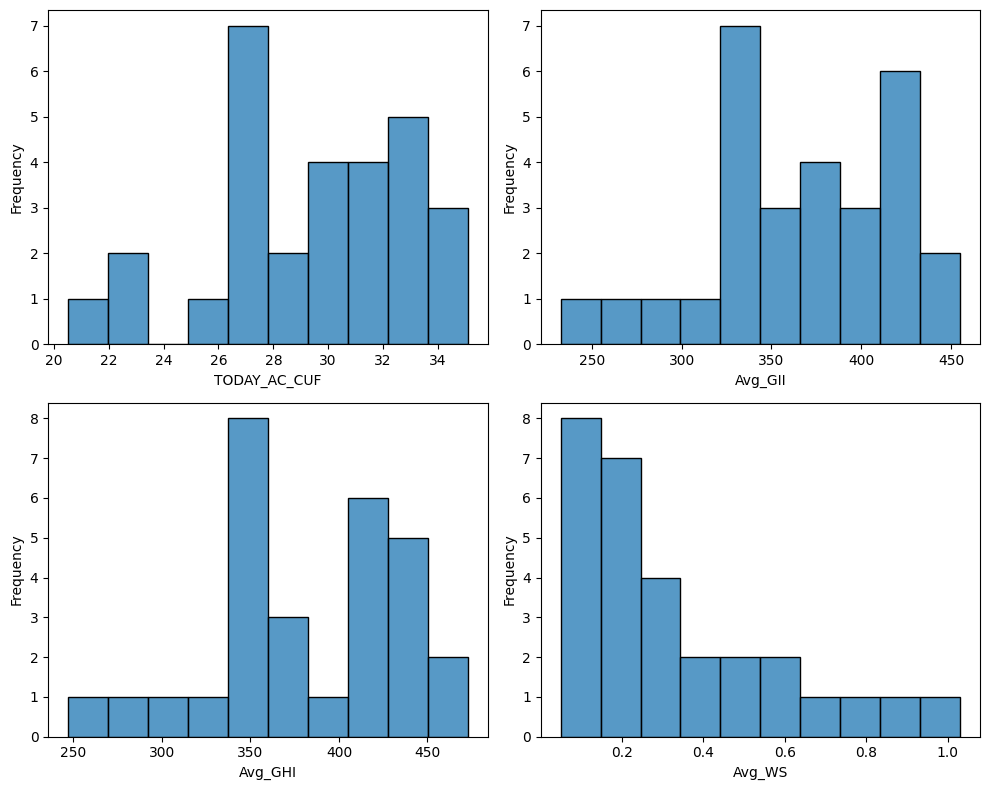

In [134]:
# Create a figure with subplots
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(10, 8))

# Plot histogram for TODAY_AC_CUF
sns.histplot(df['TODAY_AC_CUF'], bins=10, ax=axes[0, 0])
axes[0, 0].set_xlabel('TODAY_AC_CUF')
axes[0, 0].set_ylabel('Frequency')

# Plot histogram for Avg_GII
sns.histplot(df['Avg_GII'], bins=10, ax=axes[0, 1])
axes[0, 1].set_xlabel('Avg_GII')
axes[0, 1].set_ylabel('Frequency')

# Plot histogram for Avg_GHI
sns.histplot(df['Avg_GHI'], bins=10, ax=axes[1, 0])
axes[1, 0].set_xlabel('Avg_GHI')
axes[1, 0].set_ylabel('Frequency')

# Plot histogram for Avg_WS
sns.histplot(df['Avg_WS'], bins=10, ax=axes[1, 1])
axes[1, 1].set_xlabel('Avg_WS')
axes[1, 1].set_ylabel('Frequency')

# Adjust spacing between subplots
plt.tight_layout()

# Display the plot
plt.show()


### Boxplot
> Box plot, also known as a box-and-whisker plot, is a graphical representation of the distribution of a dataset. It summarizes the key characteristics of the data, including measures of central tendency, spread, and presence of outliers. A box plot provides a visual way to understand the distribution of data across different categories or groups.

>>Here are the main characteristics of a box plot:<br>1. Box:represents the interquartile range (IQR), which is the range between the first quartile (Q1) and the third quartile (Q3). It spans the middle       50% of the data. The length of the box indicates the spread or variability within this range.<br>
2. Median Line: Inside the box, there is a line that represents the median (Q2) of the data. The median divides the data into two equal halves: 50% of the data points are below the median, and 50% are above it.<br>
3. Whiskers: The whiskers extend from the box and reach out to the minimum and maximum values within a certain range. The length of the whiskers can vary, but they often extend to a maximum of 1.5 times the IQR. Data points beyond the whiskers are considered outliers.<br>
4. Outliers: Outliers are data points that fall significantly outside the normal range of values. Outliers are often marked as individual points beyond the whiskers.<br>
5. Notches (Optional): Notches can be added to the sides of the boxes. They provide an approximate 95% confidence interval for the median. If the notches of two boxes do not overlap, it can suggest that the medians are significantly different.

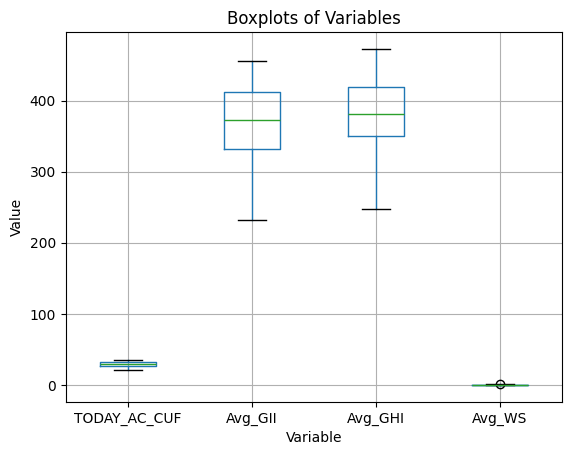

In [135]:
import pandas as pd
import matplotlib.pyplot as plt

# Create a DataFrame with the data
data = pd.DataFrame({
    'TODAY_AC_CUF': [22.84, 26.94, 31.59, 27.62, 32.41, 26.83, 27.86, 29.32, 35.08, 32.85,
                     30.18, 31.38, 26.48, 34.12, 30.86, 33.76, 33.47, 32.48, 27.42, 29.5,
                     22.87, 20.52, 25.03, 28.43, 30.45, 26.81, 32.46, 26.66, 32.15],
    'Avg_GII': [276.92, 339.82, 413.12, 344.37, 412.5, 331.73, 336.74, 372.82, 454.99, 424.42,
                374.93, 396.08, 326.27, 428.73, 393.62, 437.41, 423.19, 408.95, 339.95, 360.42,
                283.72, 232.6, 304.95, 349.88, 384.5, 329.25, 412.76, 328.48, 388.24],
    'Avg_GHI': [286.44, 349.88, 414.73, 353.02, 419.05, 341.94, 349.69, 378.02, 472.63, 438.31,
                395.24, 415.67, 345.38, 444.82, 411.85, 459.25, 446.5, 428.01, 356.02, 381.71,
                299.52, 246.97, 319.39, 370.52, 409.88, 344.59, 431.82, 352.25, 417.47],
    'Avg_WS': [0.39, 0.46, 0.08, 0.18, 0.21, 0.08, 0.17, 0.21, 0.08, 0.13,
               0.19, 0.06, 0.62, 0.27, 0.68, 0.34, 0.19, 0.56, 0.84, 1.03,
               0.75, 0.27, 0.38, 0.25, 0.14, 0.52, 0.24, 0.05, 0.11]
})

# Plot boxplots for each variable
data.boxplot()

# Set the title and labels for the plot
plt.title('Boxplots of Variables')
plt.xlabel('Variable')
plt.ylabel('Value')

# Show the plot
plt.show()


### Findings
>1. For Avg_WS, a thick line appears above the boxplot, on which there is a small circle that clearly represents an outlier. An outlier is a data point that significantly deviates from the rest of the data in the distribution. It can be either an unusually high or low value compared to the majority of the data.
2. For TODAY_AC_CUF, a compact box appears above the boxplot, that represents the IQR (interquartile range) is very low, it means that the values in your dataset are tightly clustered together. In such cases, the box plot will appear compact with a shorter box height.

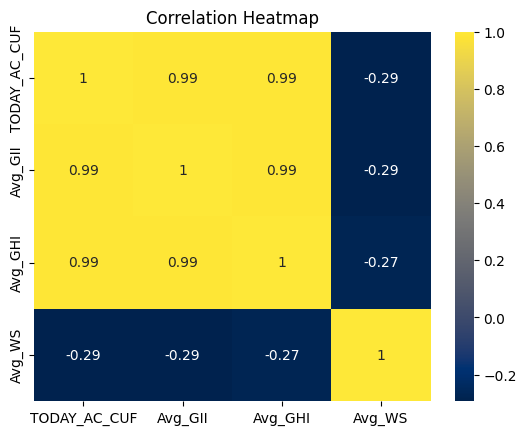

In [136]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Create a DataFrame with the data
data = {
    'TODAY_AC_CUF': [22.84, 26.94, 31.59, 27.62, 32.41, 26.83, 27.86, 29.32, 35.08, 32.85,
                     30.18, 31.38, 26.48, 34.12, 30.86, 33.76, 33.47, 32.48, 27.42, 29.5,
                     22.87, 20.52, 25.03, 28.43, 30.45, 26.81, 32.46, 26.66, 32.15],
    'Avg_GII': [276.92, 339.82, 413.12, 344.37, 412.5, 331.73, 336.74, 372.82, 454.99, 424.42,
                374.93, 396.08, 326.27, 428.73, 393.62, 437.41, 423.19, 408.95, 339.95, 360.42,
                283.72, 232.6, 304.95, 349.88, 384.5, 329.25, 412.76, 328.48, 388.24],
    'Avg_GHI': [286.44, 349.88, 414.73, 353.02, 419.05, 341.94, 349.69, 378.02, 472.63, 438.31,
                395.24, 415.67, 345.38, 444.82, 411.85, 459.25, 446.5, 428.01, 356.02, 381.71,
                299.52, 246.97, 319.39, 370.52, 409.88, 344.59, 431.82, 352.25, 417.47],
    'Avg_WS': [0.39, 0.46, 0.08, 0.18, 0.21, 0.08, 0.17, 0.21, 0.08, 0.13,
               0.19, 0.06, 0.62, 0.27, 0.68, 0.34, 0.19, 0.56, 0.84, 1.03,
               0.75, 0.27, 0.38, 0.25, 0.14, 0.52, 0.24, 0.05, 0.11]
}

df = pd.DataFrame(data)

# Calculate the correlation matrix
corr_matrix = df.corr()

# Create a heatmap with a different colormap
sns.heatmap(corr_matrix, annot=True, cmap='cividis')  
plt.title('Correlation Heatmap')
plt.show()


### Findings
>The above heatmap displays the correlation coefficients between pairs of parameters as colour-coded cells. The color intensity or shade indicates the strength of the correlation.

>Yellow represents stronger positive correlations, while dark blue represent weaker positive correlations.

>>1. Positive Correlations: If two parameters have a positive correlation, it means they tend to increase or decrease together. In the heatmap, dark blue cells indicate strong positive correlations.Like Avg_GII with TODAY_ac_cuf
2. Negative Correlations: If two parameters have a negative correlation, it means that when one parameter increases, the other parameter tends to decrease, and vice versa. For example, 'TODAY_AC_CUF' and 'Avg_WS'
3. Self-Correlation: The diagonal cells in the heatmap represent the self-correlation of each parameter. Since a parameter perfectly correlates with itself.

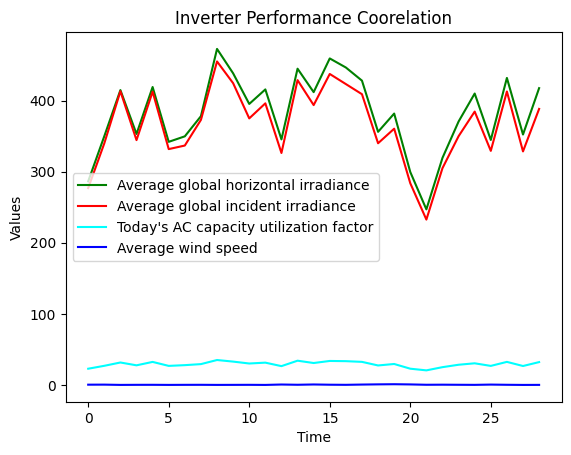

In [137]:
import matplotlib.pyplot as plt

# Dataset
TODAY_AC_CUF = [22.84, 26.94, 31.59, 27.62, 32.41, 26.83, 27.86, 29.32, 35.08, 32.85, 30.18, 31.38, 26.48, 34.12, 30.86, 33.76, 33.47, 32.48, 27.42, 29.5, 22.87, 20.52, 25.03, 28.43, 30.45, 26.81, 32.46, 26.66, 32.15]
Avg_GII = [276.92, 339.82, 413.12, 344.37, 412.5, 331.73, 336.74, 372.82, 454.99, 424.42, 374.93, 396.08, 326.27, 428.73, 393.62, 437.41, 423.19, 408.95, 339.95, 360.42, 283.72, 232.6, 304.95, 349.88, 384.5, 329.25, 412.76, 328.48, 388.24]
Avg_GHI = [286.44, 349.88, 414.73, 353.02, 419.05, 341.94, 349.69, 378.02, 472.63, 438.31, 395.24, 415.67, 345.38, 444.82, 411.85, 459.25, 446.5, 428.01, 356.02, 381.71, 299.52, 246.97, 319.39, 370.52, 409.88, 344.59, 431.82, 352.25, 417.47]
Avg_WS = [0.39, 0.46, 0.08, 0.18, 0.21, 0.08, 0.17, 0.21, 0.08, 0.13, 0.19, 0.06, 0.62, 0.27, 0.68, 0.34, 0.19, 0.56, 0.84, 1.03, 0.75, 0.27, 0.38, 0.25, 0.14, 0.52, 0.24, 0.05, 0.11]

# line chart
plt.plot(Avg_GHI, color='green', label='Average global horizontal irradiance')
plt.plot(Avg_GII, color='red',label='Average global incident irradiance')
plt.plot(TODAY_AC_CUF, color='cyan',label="Today's AC capacity utilization factor")
plt.plot(Avg_WS, color='blue',label='Average wind speed')


# Set labels and title
plt.xlabel('Time')
plt.ylabel('Values')
plt.title('Inverter Performance Coorelation')

# Add legend
plt.legend()

# Show the plot
plt.show()

### Findings
>1. [a] In the above line chart for the Average Global Horizontal Irradiance and Average Global Incident Irradiance shows similar peaks and downturns, it indicates a strong correlation between these two variables. As one variable increases, the other variable also tends to increase, and vice versa. <br>[b] Both variables may be influenced by similar external factors. When these factors affect one variable, they are likely to impact the other variable in a similar manner, resulting in synchronized peaks and downturns.<br>
2. The line chart for Average Wind Speed (AVG_WS) appears to be almost a straight line near the x-axis, it indicates that the values of AVG_WS are relatively consistent or does not change significantly throughout the observed period or have very little variation across the data points.<br>
3. [a] The line chart for (TODAY_AC_CUF) appears slightly wavy compared to the lines for Average Global Horizontal Irradiance and Average Global Incident Irradiance, and there are points where there is a downturn in the wind speed at the peaks of irradiance, it suggests a possible negative relationship or correlation between these variables. <br>[b] The downturn in wind speed at the peaks of irradiance suggests that the availability of solar energy (indicated by irradiance) may have a negative impact on wind speed.This relationship is often referred to as the "solar-wind power trade-off"

### Linear Regression

In [138]:
# Split the data into independent (X) and dependent variable (y)
X = df[['Avg_GII', 'Avg_GHI', 'Avg_WS']]
y = df['TODAY_AC_CUF']

In [139]:
# Splitting after filtering
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42) 


In [140]:
y_test

27    26.66
16    33.47
12    26.48
22    25.03
8     35.08
9     32.85
Name: TODAY_AC_CUF, dtype: float64

In [141]:
# Initialize the linear regression model
model = LinearRegression()
# Train the model
model.fit(X_train, y_train)

LinearRegression()

In [142]:
# Make predictions on the test set
y_pred = model.predict(X_train)

In [143]:
# Retrieve the regression coefficients (b1, b2, ..., bn)
regression_coefficients = model.coef_

# Retrieve the intercept (b0)
intercept = model.intercept_

# regression equation 
regression_equation = 'y = {:.2f} + '.format(intercept)
for i, coefficient in enumerate(regression_coefficients):
    regression_equation += '{:.2f}x{} + '.format(coefficient, i+1)
regression_equation = regression_equation[:-3] 
print('Regression Equation:', regression_equation)


Regression Equation: y = 4.02 + 0.02x1 + 0.05x2 + -0.40x3


In [144]:
predictions = model.predict(X_train)

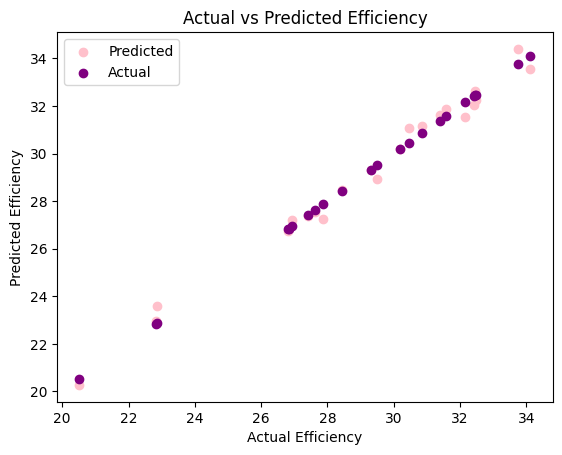

In [145]:
plt.scatter(y_train, y_pred, color='pink', label='Predicted')
plt.scatter(y_train, y_train, color='purple', label='Actual')
plt.xlabel('Actual Efficiency')
plt.ylabel('Predicted Efficiency')
plt.title('Actual vs Predicted Efficiency')

plt.legend()
plt.show()

### Findings
>1. In the above Scatter plot, predicted values are very close to the actual values, it indicates that the predicted values are almost identical to the actual values. Hence, the regression model is performing well and accurately predicting the target variable.<br>
2. The scatter plot shows the relationship between the predicted values and the actual values, where each point represents an observation.